In [1]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns

filterwarnings('ignore')
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#### 数据查看

In [2]:
df=pd.read_csv('./Covid Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [3]:
df.shape

(1048575, 21)

In [4]:
df.head(3)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2


In [5]:
df.isna().sum().sum()

0

#### 数据清洗

In [6]:
def show_values_table(df): 
    '''
    展示各列的值
    输入：原数据
    输出：各列值表格
    '''
    values = []
    counts = []
    for i in range(df.shape[1]):
        v = df.iloc[:,i].unique()
        if len(v)> 15:
            vv = list(v[0:15])
            vv.append('...')
            values.append(vv)
        else:
            values.append(v)
        counts.append(len(v))
    table=pd.DataFrame(data={'Counts':counts,'Values':values},index=df.columns)
    return table
def missing_values_table(df):
    '''
    生成缺失值表格
    输入：原数据
    输出：缺失值表格
    '''
    miss = np.zeros(df.shape[1],dtype=int)
    for i in range(df.shape[1]):
        if not df.columns[i] == 'AGE':#年龄无缺失值
            miss[i]=len(df[(df.iloc[:,i]==98) | (df.iloc[:,i]==99) | (df.iloc[:,i]==97)])
        else:
            miss[i]=0
    percent = np.round(miss* 100 /len(df),2)
    table=pd.DataFrame(data={'Missing Values':miss,'Percent(%)':percent},index=df.columns)
    table.sort_values(ascending = False, inplace=True,by='Percent(%)')
    return table

def clean_97(df,lst):
    '''
    处理同一列出现两种缺失值的列
    输入：待处理数据框和待处理的列名
    输出：处理后数据框
    '''
    for i in lst:
        df[i] = df[i].replace(97,2)
    return df

def delete_missing_values(df,missing_table):
    '''
    删除缺失值比例小于阈值的列的数据
    输入：原数据框和缺失数据统计表
    输出：删除部分缺失值的数据框
    
    '''
    for i in range(0,len(missing_table)):
        if missing_table.iloc[i,1] < 5 and missing_table.iloc[i,1] > 0:
            df = df[(df[missing_table.index[i]]==1)|(df[missing_table.index[i]]==2)]
    return df

In [7]:
#查看各列的值的情况
show_values_table(df)

,Counts,Values
USMER,2,"[2, 1]"
MEDICAL_UNIT,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]"
SEX,2,"[1, 2]"
PATIENT_TYPE,2,"[1, 2]"
DATE_DIED,401,"[03/05/2020, 03/06/2020, 09/06/2020, 12/06/202..."
INTUBED,4,"[97, 1, 2, 99]"
PNEUMONIA,3,"[1, 2, 99]"
AGE,121,"[65, 72, 55, 53, 68, 40, 64, 37, 25, 38, 24, 3..."
PREGNANT,4,"[2, 97, 98, 1]"
DIABETES,3,"[2, 1, 98]"


In [8]:
#查看缺失值
missing_values_table(df)

,Missing Values,Percent(%)
ICU,856032,81.64
INTUBED,855869,81.62
PREGNANT,527265,50.28
PNEUMONIA,16003,1.53
OTHER_DISEASE,5045,0.48
INMSUPR,3404,0.32
DIABETES,3338,0.32
TOBACCO,3220,0.31
HIPERTENSION,3104,0.30
RENAL_CHRONIC,3006,0.29


In [9]:
df.groupby(['PATIENT_TYPE','ICU']).count()

USMER  MEDICAL_UNIT     SEX  DATE_DIED  INTUBED  PNEUMONIA  \
PATIENT_TYPE ICU                                                                
1            97   848544        848544  848544     848544   848544     848544   
2            1     16858         16858   16858      16858    16858      16858   
             2    175685        175685  175685     175685   175685     175685   
             99     7488          7488    7488       7488     7488       7488   

                     AGE  PREGNANT  DIABETES    COPD  ASTHMA  INMSUPR  \
PATIENT_TYPE ICU                                                        
1            97   848544    848544    848544  848544  848544   848544   
2            1     16858     16858     16858   16858   16858    16858   
             2    175685    175685    175685  175685  175685   175685   
             99     7488      7488      7488    7488    7488     7488   

                  HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
PATIENT_TYPE ICU                                                         
1            97         848544         848544          848544   848544   
2            1           16858          16858           16858    16858   
             2          175685         175685          175685   175685   
             99           7488           7488            7488     7488   

                  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  
PATIENT_TYPE ICU                                                
1            97          848544   848544                848544  
2            1            16858    16858                 16858  
             2           175685   175685                175685  
             99            7488     7488                  7488

In [10]:
df.groupby(['PATIENT_TYPE','INTUBED']).count()

USMER  MEDICAL_UNIT     SEX  DATE_DIED  PNEUMONIA  \
PATIENT_TYPE INTUBED                                                       
1            97       848544        848544  848544     848544     848544   
2            1         33656         33656   33656      33656      33656   
             2        159050        159050  159050     159050     159050   
             99         7325          7325    7325       7325       7325   

                         AGE  PREGNANT  DIABETES    COPD  ASTHMA  INMSUPR  \
PATIENT_TYPE INTUBED                                                        
1            97       848544    848544    848544  848544  848544   848544   
2            1         33656     33656     33656   33656   33656    33656   
             2        159050    159050    159050  159050  159050   159050   
             99         7325      7325      7325    7325    7325     7325   

                      HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
PATIENT_TYPE INTUBED                                                         
1            97             848544         848544          848544   848544   
2            1               33656          33656           33656    33656   
             2              159050         159050          159050   159050   
             99               7325           7325            7325     7325   

                      RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL     ICU  
PATIENT_TYPE INTUBED                                                        
1            97              848544   848544                848544  848544  
2            1                33656    33656                 33656   33656  
             2               159050   159050                159050  159050  
             99                7325     7325                  7325    7325

In [11]:
df.groupby(['SEX','PREGNANT']).count()

USMER  MEDICAL_UNIT  PATIENT_TYPE  DATE_DIED  INTUBED  \
SEX PREGNANT                                                           
1   1           8131          8131          8131       8131     8131   
    2         513179        513179        513179     513179   513179   
    98          3754          3754          3754       3754     3754   
2   97        523511        523511        523511     523511   523511   

              PNEUMONIA     AGE  DIABETES    COPD  ASTHMA  INMSUPR  \
SEX PREGNANT                                                         
1   1              8131    8131      8131    8131    8131     8131   
    2            513179  513179    513179  513179  513179   513179   
    98             3754    3754      3754    3754    3754     3754   
2   97           523511  523511    523511  523511  523511   523511   

              HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  \
SEX PREGNANT                                                         
1   1                 8131           8131            8131     8131   
    2               513179         513179          513179   513179   
    98                3754           3754            3754     3754   
2   97              523511         523511          523511   523511   

              RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL     ICU  
SEX PREGNANT                                                        
1   1                  8131     8131                  8131    8131  
    2                513179   513179                513179  513179  
    98                 3754     3754                  3754    3754  
2   97               523511   523511                523511  523511

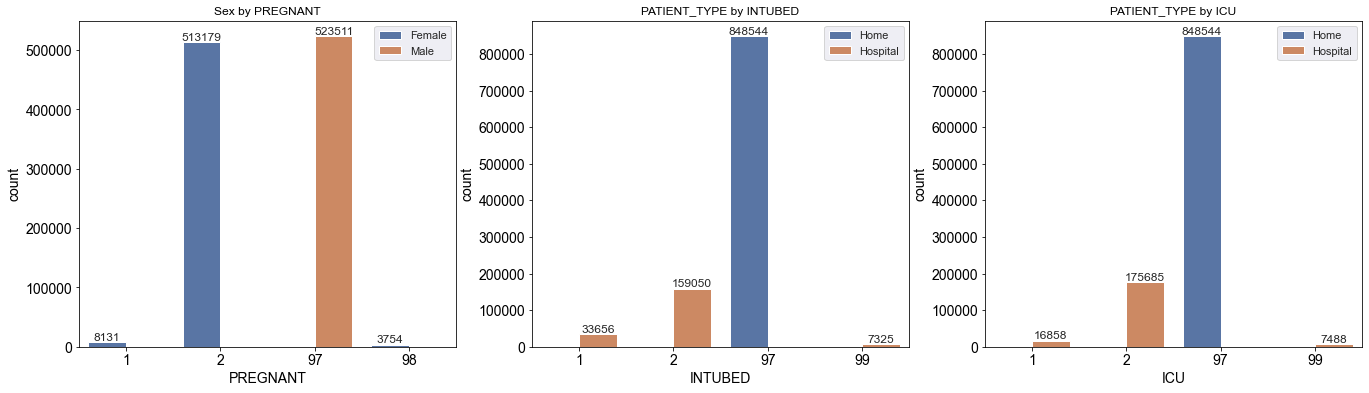

In [12]:
dfv=df.copy()
col_1 = ['PREGNANT', 'INTUBED',  'ICU']

dfv.loc[dfv['SEX']==1,'SEX']='Female'
dfv.loc[dfv['SEX']==2,'SEX']='Male'
dfv.loc[dfv['PATIENT_TYPE']==1,'PATIENT_TYPE']='Home'
dfv.loc[dfv['PATIENT_TYPE']==2,'PATIENT_TYPE']='Hospital'
plt.rcParams.update({'font.size': 14})
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(23,6))
sns.set(style="darkgrid")

for i, item in enumerate(col_1):
    plt.subplot(1,3,(i+1))
    if item=='PREGNANT':
        ax=sns.countplot(x=item,hue="SEX",data=dfv)
        plt.title("Sex by "+item)
    else:
        ax=sns.countplot(x=item,hue="PATIENT_TYPE",data=dfv)
        plt.title("PATIENT_TYPE by "+item)
    plt.xlabel(item)
    plt.bar_label(ax.containers[0])
    plt.bar_label(ax.containers[1])
    plt.legend(loc="best");

In [13]:
df=clean_97(df,['ICU','INTUBED','PREGNANT'])
show_values_table(df)

,Counts,Values
USMER,2,"[2, 1]"
MEDICAL_UNIT,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]"
SEX,2,"[1, 2]"
PATIENT_TYPE,2,"[1, 2]"
DATE_DIED,401,"[03/05/2020, 03/06/2020, 09/06/2020, 12/06/202..."
INTUBED,3,"[2, 1, 99]"
PNEUMONIA,3,"[1, 2, 99]"
AGE,121,"[65, 72, 55, 53, 68, 40, 64, 37, 25, 38, 24, 3..."
PREGNANT,3,"[2, 98, 1]"
DIABETES,3,"[2, 1, 98]"


In [14]:
missing_table = missing_values_table(df)
missing_table

,Missing Values,Percent(%)
PNEUMONIA,16003,1.53
ICU,7488,0.71
INTUBED,7325,0.70
OTHER_DISEASE,5045,0.48
PREGNANT,3754,0.36
INMSUPR,3404,0.32
DIABETES,3338,0.32
TOBACCO,3220,0.31
HIPERTENSION,3104,0.30
RENAL_CHRONIC,3006,0.29


In [15]:
df=delete_missing_values(df,missing_table)
show_values_table(df)

,Counts,Values
USMER,2,"[2, 1]"
MEDICAL_UNIT,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]"
SEX,2,"[1, 2]"
PATIENT_TYPE,2,"[1, 2]"
DATE_DIED,393,"[03/05/2020, 03/06/2020, 09/06/2020, 12/06/202..."
INTUBED,2,"[2, 1]"
PNEUMONIA,2,"[1, 2]"
AGE,121,"[65, 72, 55, 53, 68, 40, 64, 37, 25, 38, 24, 3..."
PREGNANT,2,"[2, 1]"
DIABETES,2,"[2, 1]"


In [16]:
#新增死亡列 1代表死亡 2代表存活
df["DEATH"] = [2 if date=="9999-99-99" else 1 for date in df.DATE_DIED]
df.drop('DATE_DIED',axis=1,inplace=True)
show_values_table(df)

,Counts,Values
USMER,2,"[2, 1]"
MEDICAL_UNIT,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]"
SEX,2,"[1, 2]"
PATIENT_TYPE,2,"[1, 2]"
INTUBED,2,"[2, 1]"
PNEUMONIA,2,"[1, 2]"
AGE,121,"[65, 72, 55, 53, 68, 40, 64, 37, 25, 38, 24, 3..."
PREGNANT,2,"[2, 1]"
DIABETES,2,"[2, 1]"
COPD,2,"[2, 1]"


#### 数据可视化

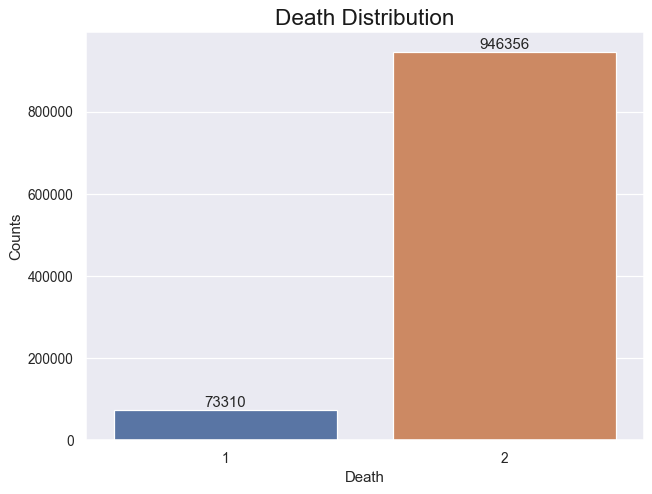

In [17]:
plt.rcParams.update({'font.size': 14})
fig= plt.figure(figsize=(8, 6), dpi=90)
sns.set(style="darkgrid")
ax = sns.countplot(x="DEATH",data=df)
plt.xlabel("Death")
plt.ylabel("Counts")
plt.title("Death Distribution", fontsize=18,color="k")
plt.bar_label(ax.containers[0]);

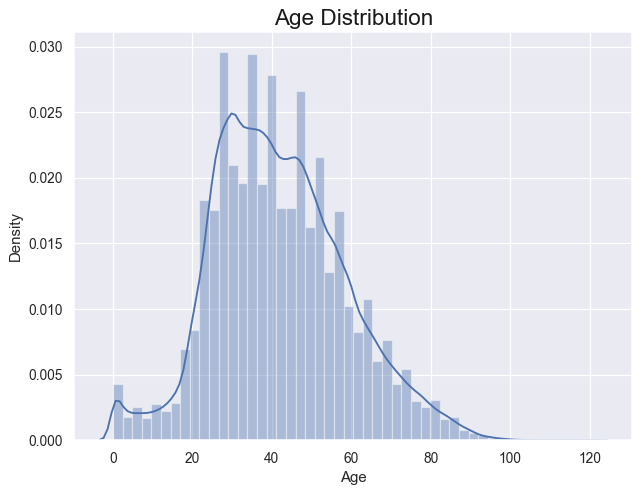

In [18]:
plt.rcParams.update({'font.size': 14})
fig= plt.figure(figsize=(8, 6), dpi=90)
sns.set(style="darkgrid")
sns.distplot(df.AGE)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("Age Distribution", fontsize=18,color="k");

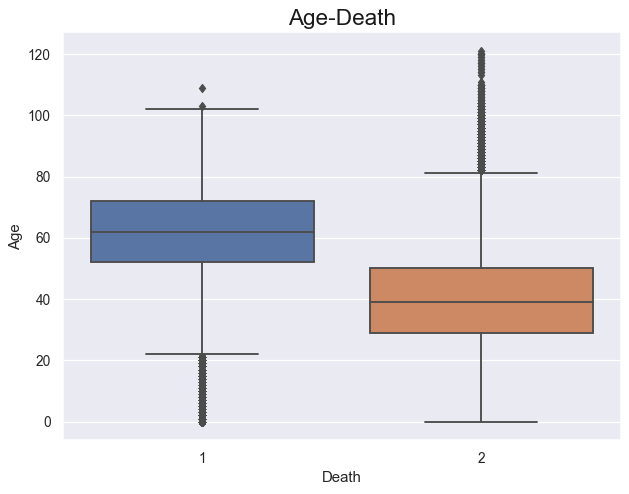

In [19]:
plt.rcParams.update({'font.size': 14})
fig= plt.figure(figsize=(8, 6), dpi=90)
sns.set(style="darkgrid")
sns.boxplot(x="DEATH", y="AGE",data=df)
plt.xlabel("Death")
plt.ylabel("Age")
plt.title("Age-Death", fontsize=18,color="k");

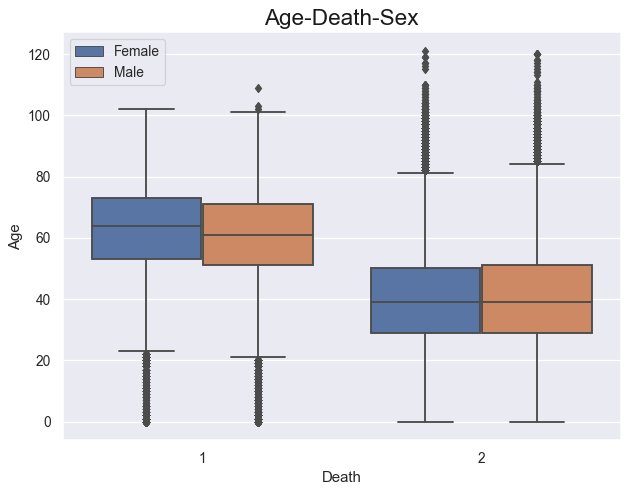

In [20]:
dfv = df.copy()
dfv.loc[dfv['SEX']==1,'SEX']='Female'
dfv.loc[dfv['SEX']==2,'SEX']='Male'

plt.rcParams.update({'font.size': 14})
fig= plt.figure(figsize=(8, 6), dpi=90)
sns.set(style="darkgrid")

sns.boxplot(x="DEATH", y="AGE",hue="SEX",data=dfv)

plt.xlabel("Death")
plt.ylabel("Age")
plt.title("Age-Death-Sex",fontsize=18, color="k")
plt.legend(loc="best");

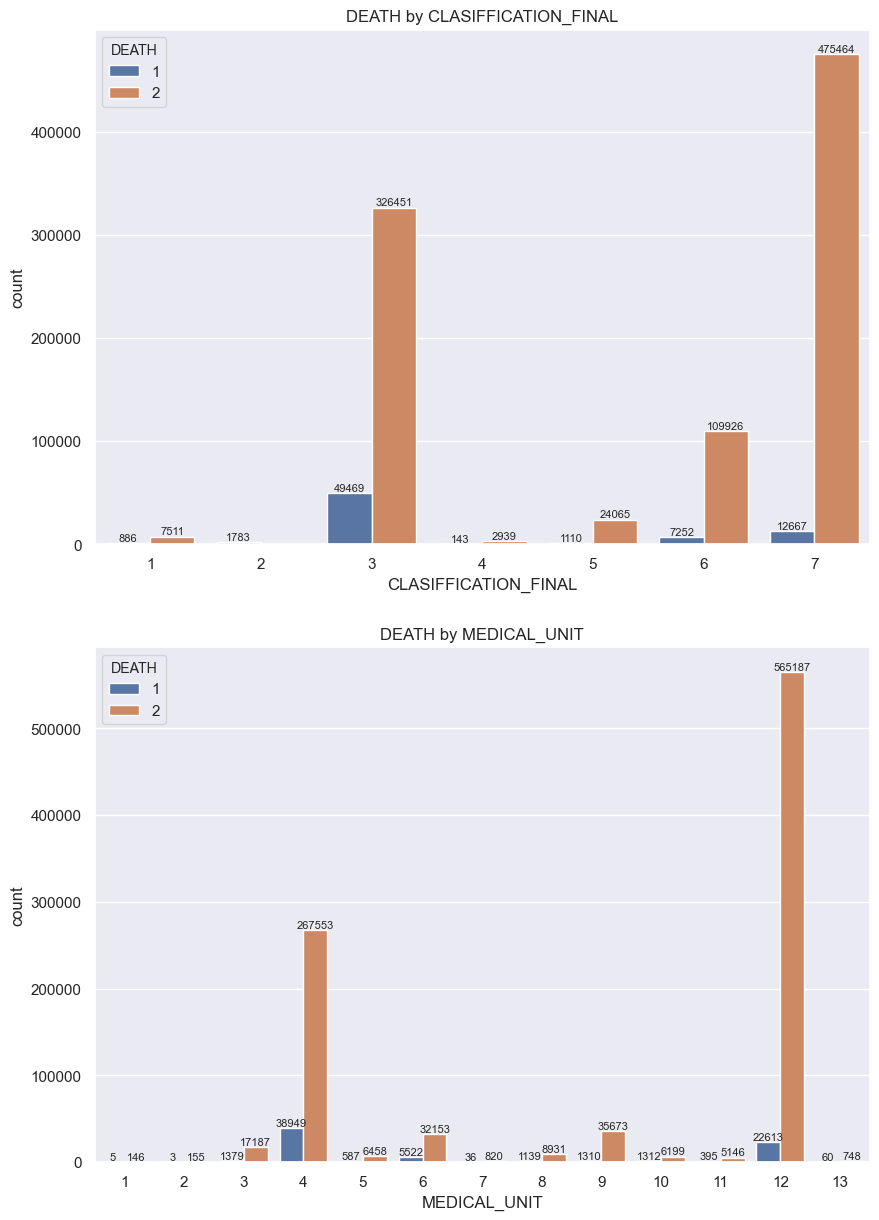

In [21]:
plt.rcParams.update({'font.size': 14})
sns.set(style="darkgrid")
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,15),dpi=100)

col_l=['CLASIFFICATION_FINAL','MEDICAL_UNIT']
for i, item in enumerate(col_l):
    plt.subplot(2,1,(i+1))
    ax=sns.countplot(x=item,hue='DEATH',data=dfv)
    plt.xlabel(item)
    plt.title('DEATH'+' by '+ item)
    plt.bar_label(ax.containers[0],fontsize=8)
    plt.bar_label(ax.containers[1],fontsize=8)

In [22]:
class Relation_between_two_variables():
    def __init__(self,hue):
        self.h = hue
    def plot(self,dic):
        '''
        绘图
        输入：包含绘画参数的字典
        '''
        try:
            col_l = dic['lst']
            nr = dic['rows']
            nc = dic['cols']
        except KeyError:
            print("参数字典格式错误！正确的键名为：'rows','cols',和'lst'!")
        else:
            plt.rcParams.update({'font.size': 14})
            sns.set(style="darkgrid")
            fig,axes=plt.subplots(nrows=nr,ncols=nc,figsize=(nc*6,nr*6),dpi=200)
        
            for i, item in enumerate(col_l):
                plt.subplot(nr,nc,(i+1))
                ax=sns.countplot(x=item,hue=self.h,data=dfv)
                plt.xlabel(item)
                plt.title(self.h +' by '+ item)
                plt.bar_label(ax.containers[0])
                plt.bar_label(ax.containers[1])
        
        return

In [23]:
dfv = df.copy()
dfv.loc[dfv['DEATH']==1,'DEATH']='Yes'
dfv.loc[dfv['DEATH']==2,'DEATH']='No'
plot_death = Relation_between_two_variables('DEATH')

In [24]:
dic={'lst':['PNEUMONIA', 'DIABETES', 'COPD',  
            'ASTHMA','INMSUPR','HIPERTENSION',
            'CARDIOVASCULAR','RENAL_CHRONIC','OTHER_DISEASE']}
plot_death.plot(dic)

参数字典格式错误！正确的键名为：'rows','cols',和'lst'!


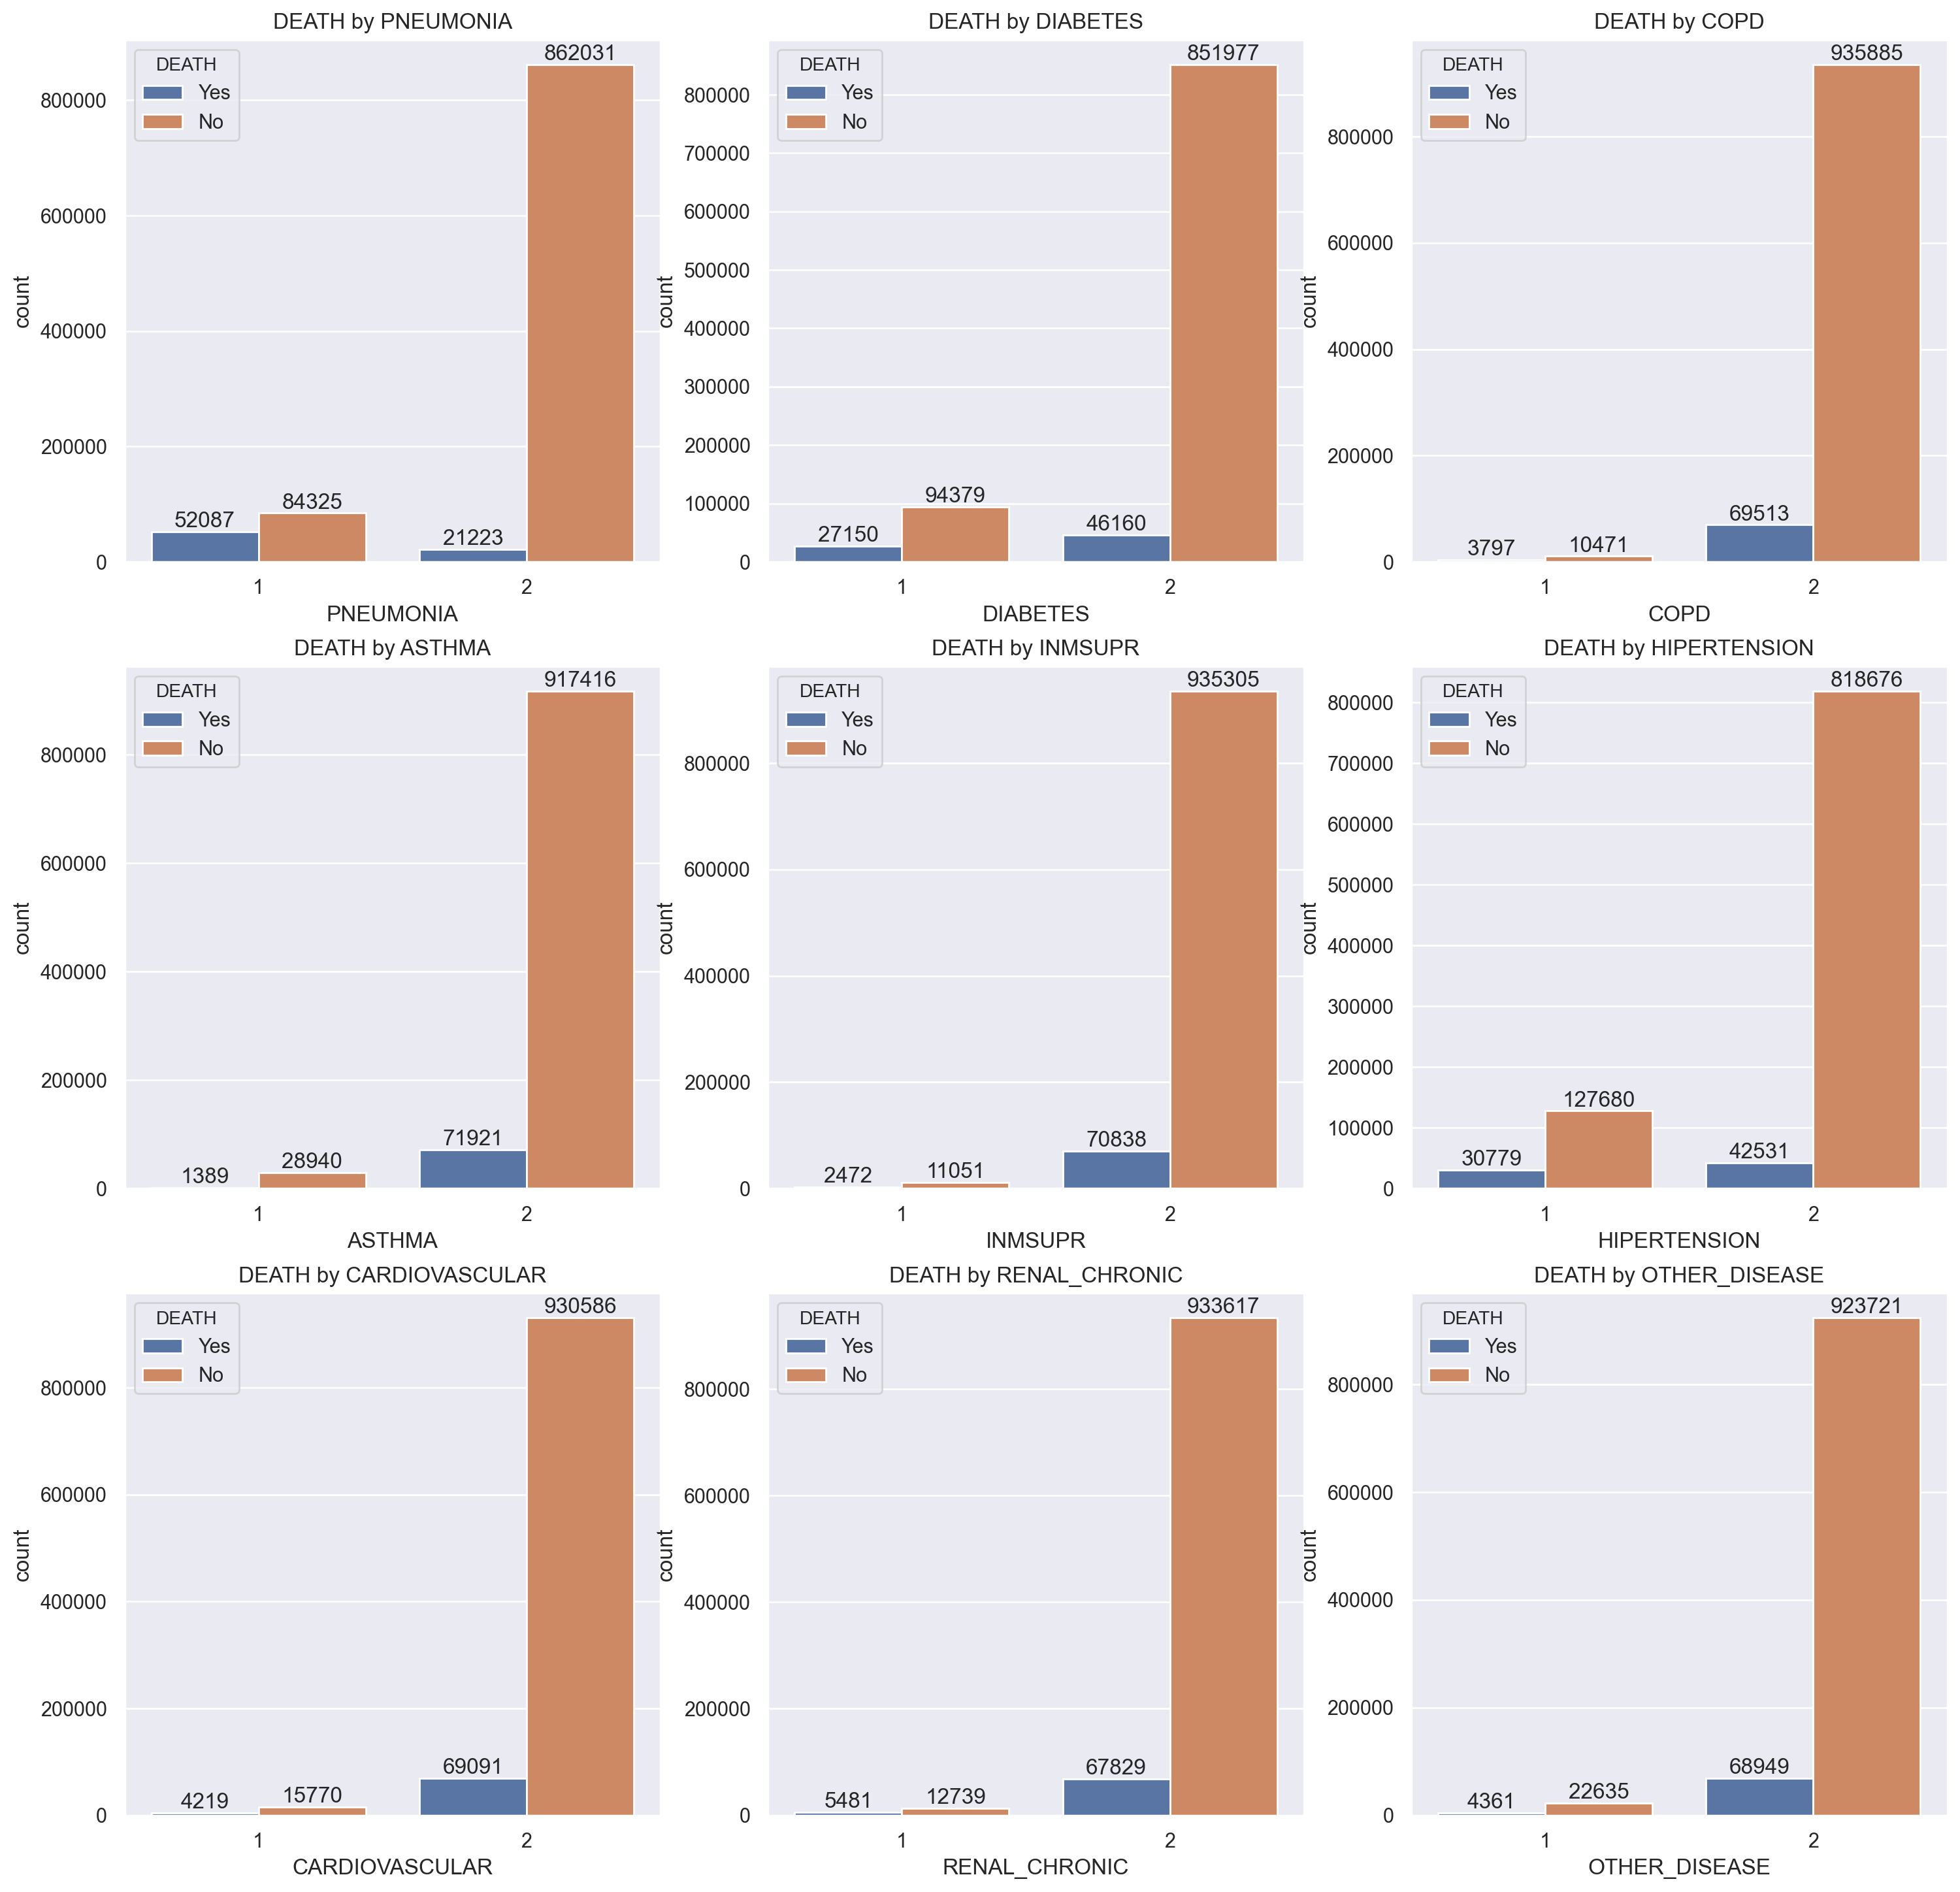

In [25]:
#各类疾病与死亡的关系
dic1={'rows':3,'cols':3,'lst':['PNEUMONIA', 'DIABETES', 'COPD', 
                               'ASTHMA','INMSUPR','HIPERTENSION',
                              'CARDIOVASCULAR','RENAL_CHRONIC','OTHER_DISEASE']}
plot_death.plot(dic1)

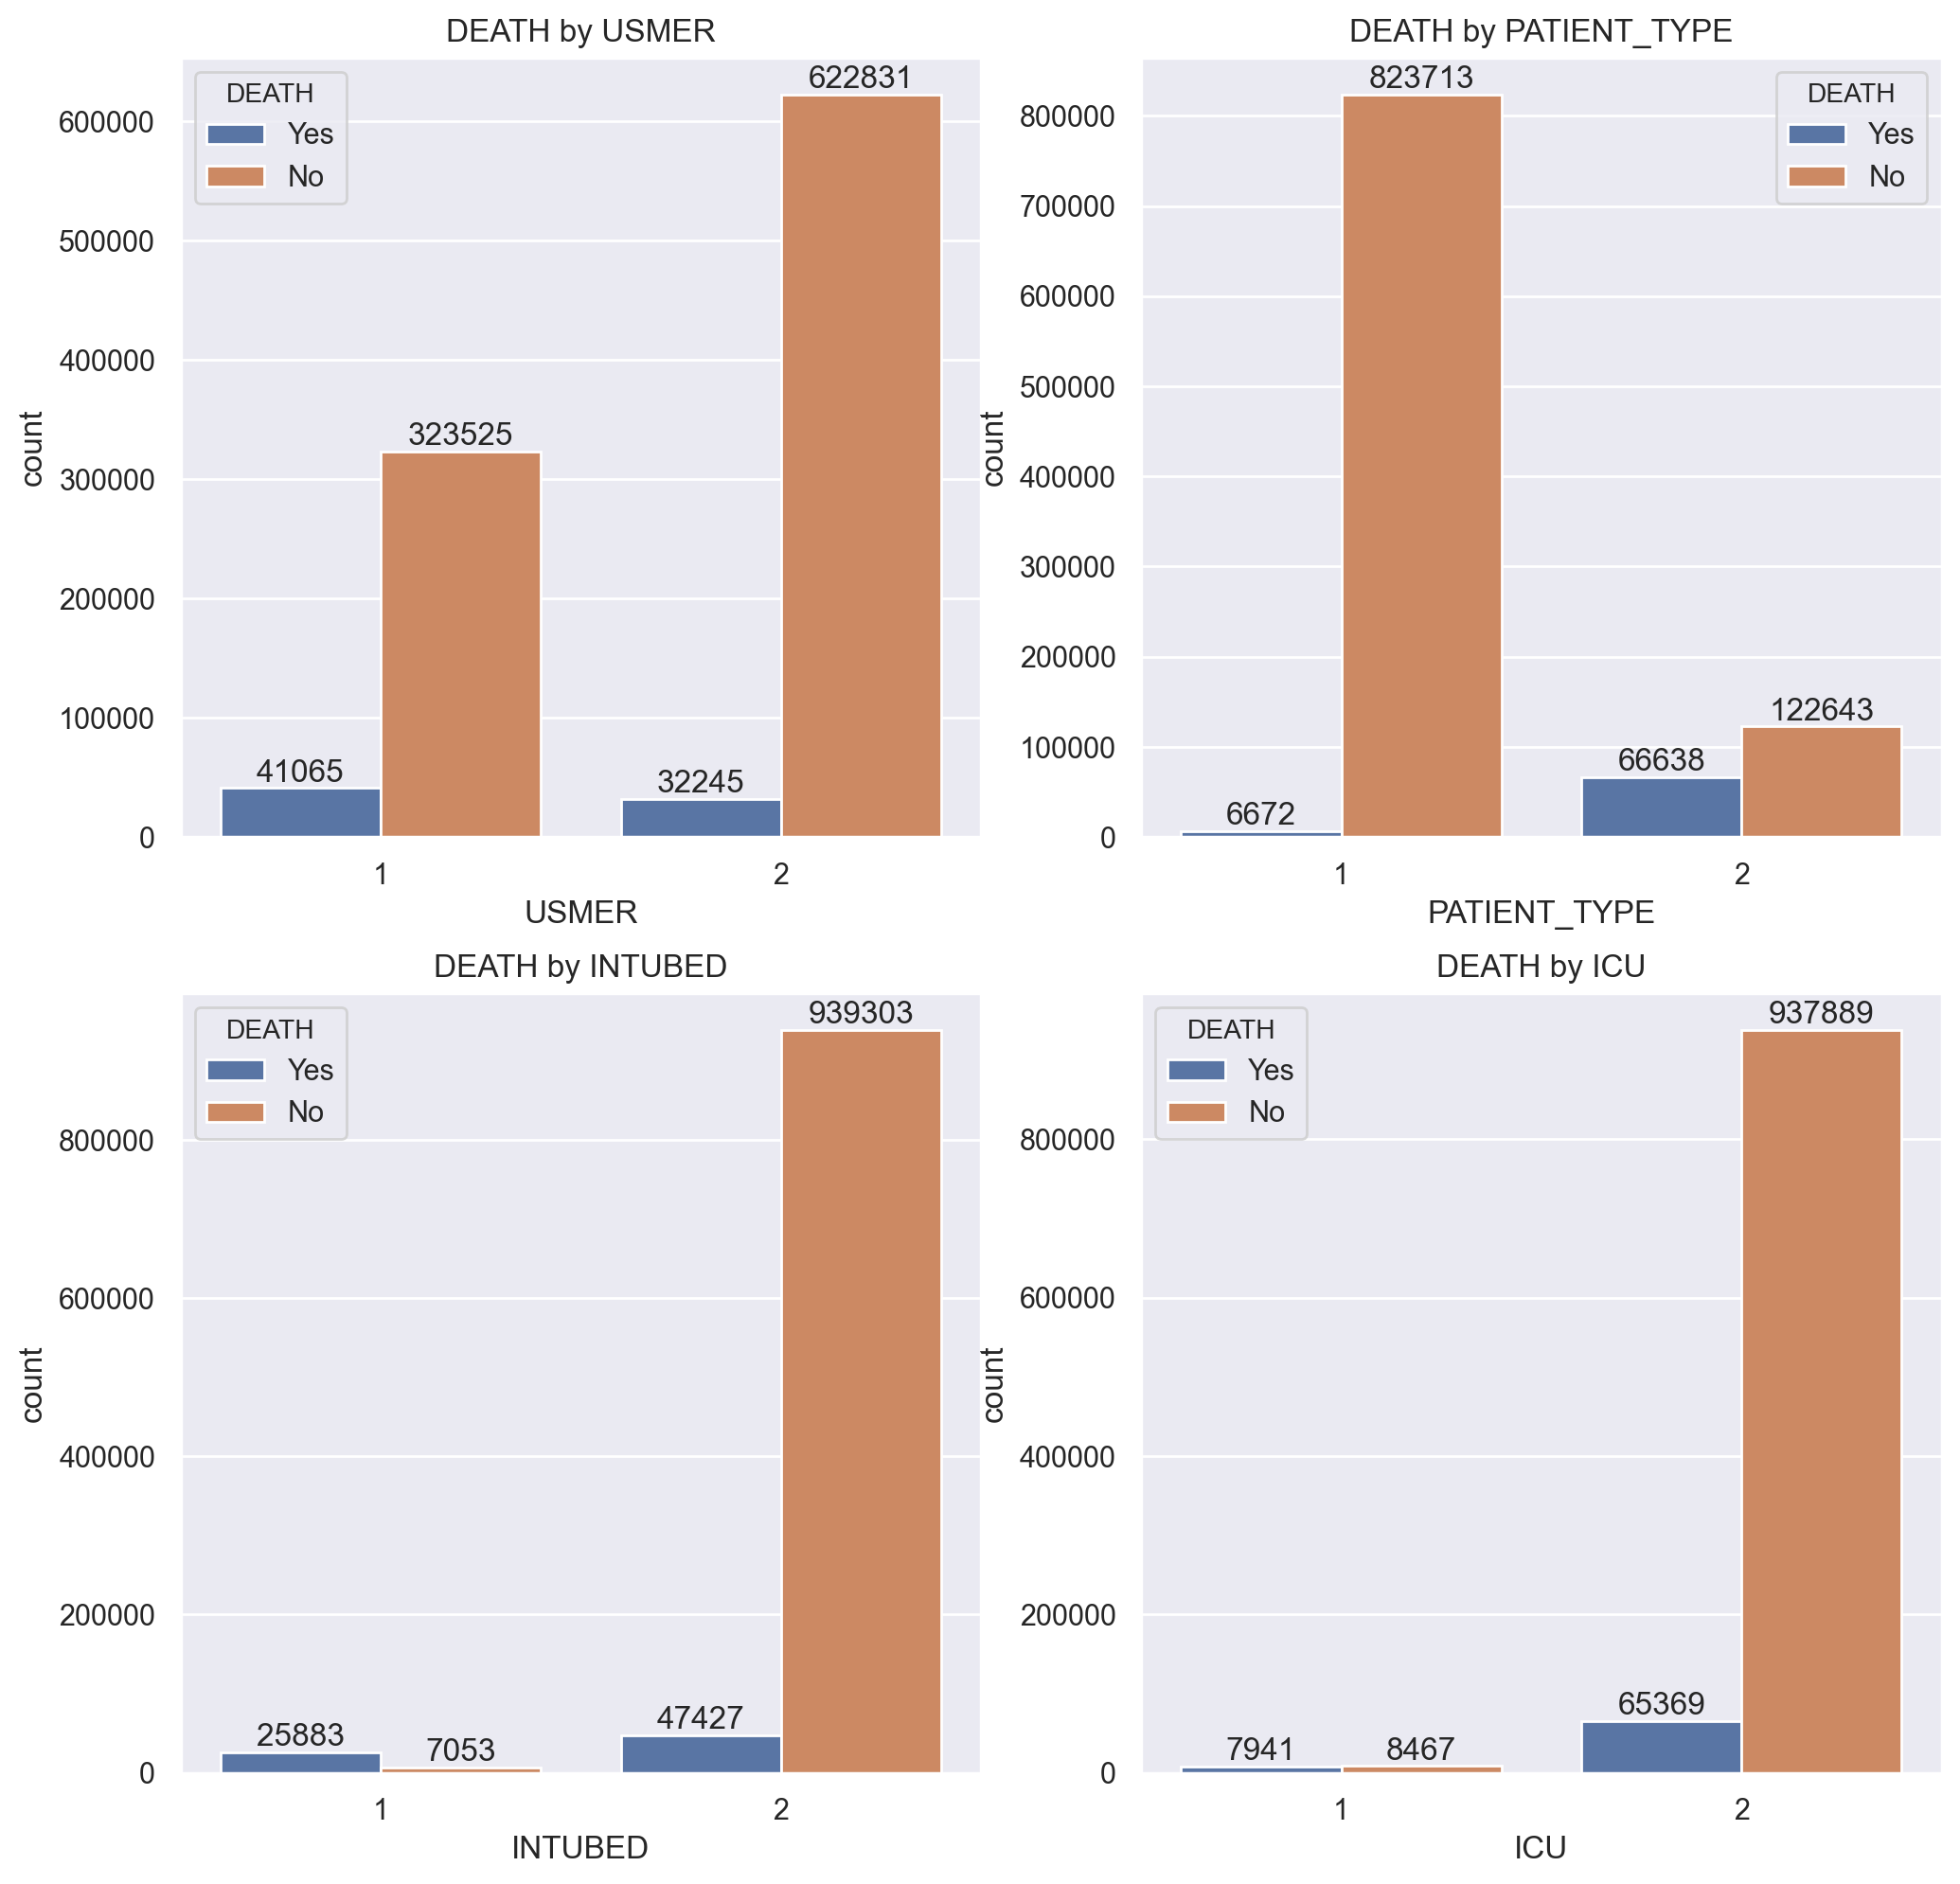

In [26]:
#治疗情况
dic2={'rows':2,'cols':2,'lst':['USMER', 'PATIENT_TYPE', 'INTUBED', 'ICU']}
plot_death.plot(dic2)

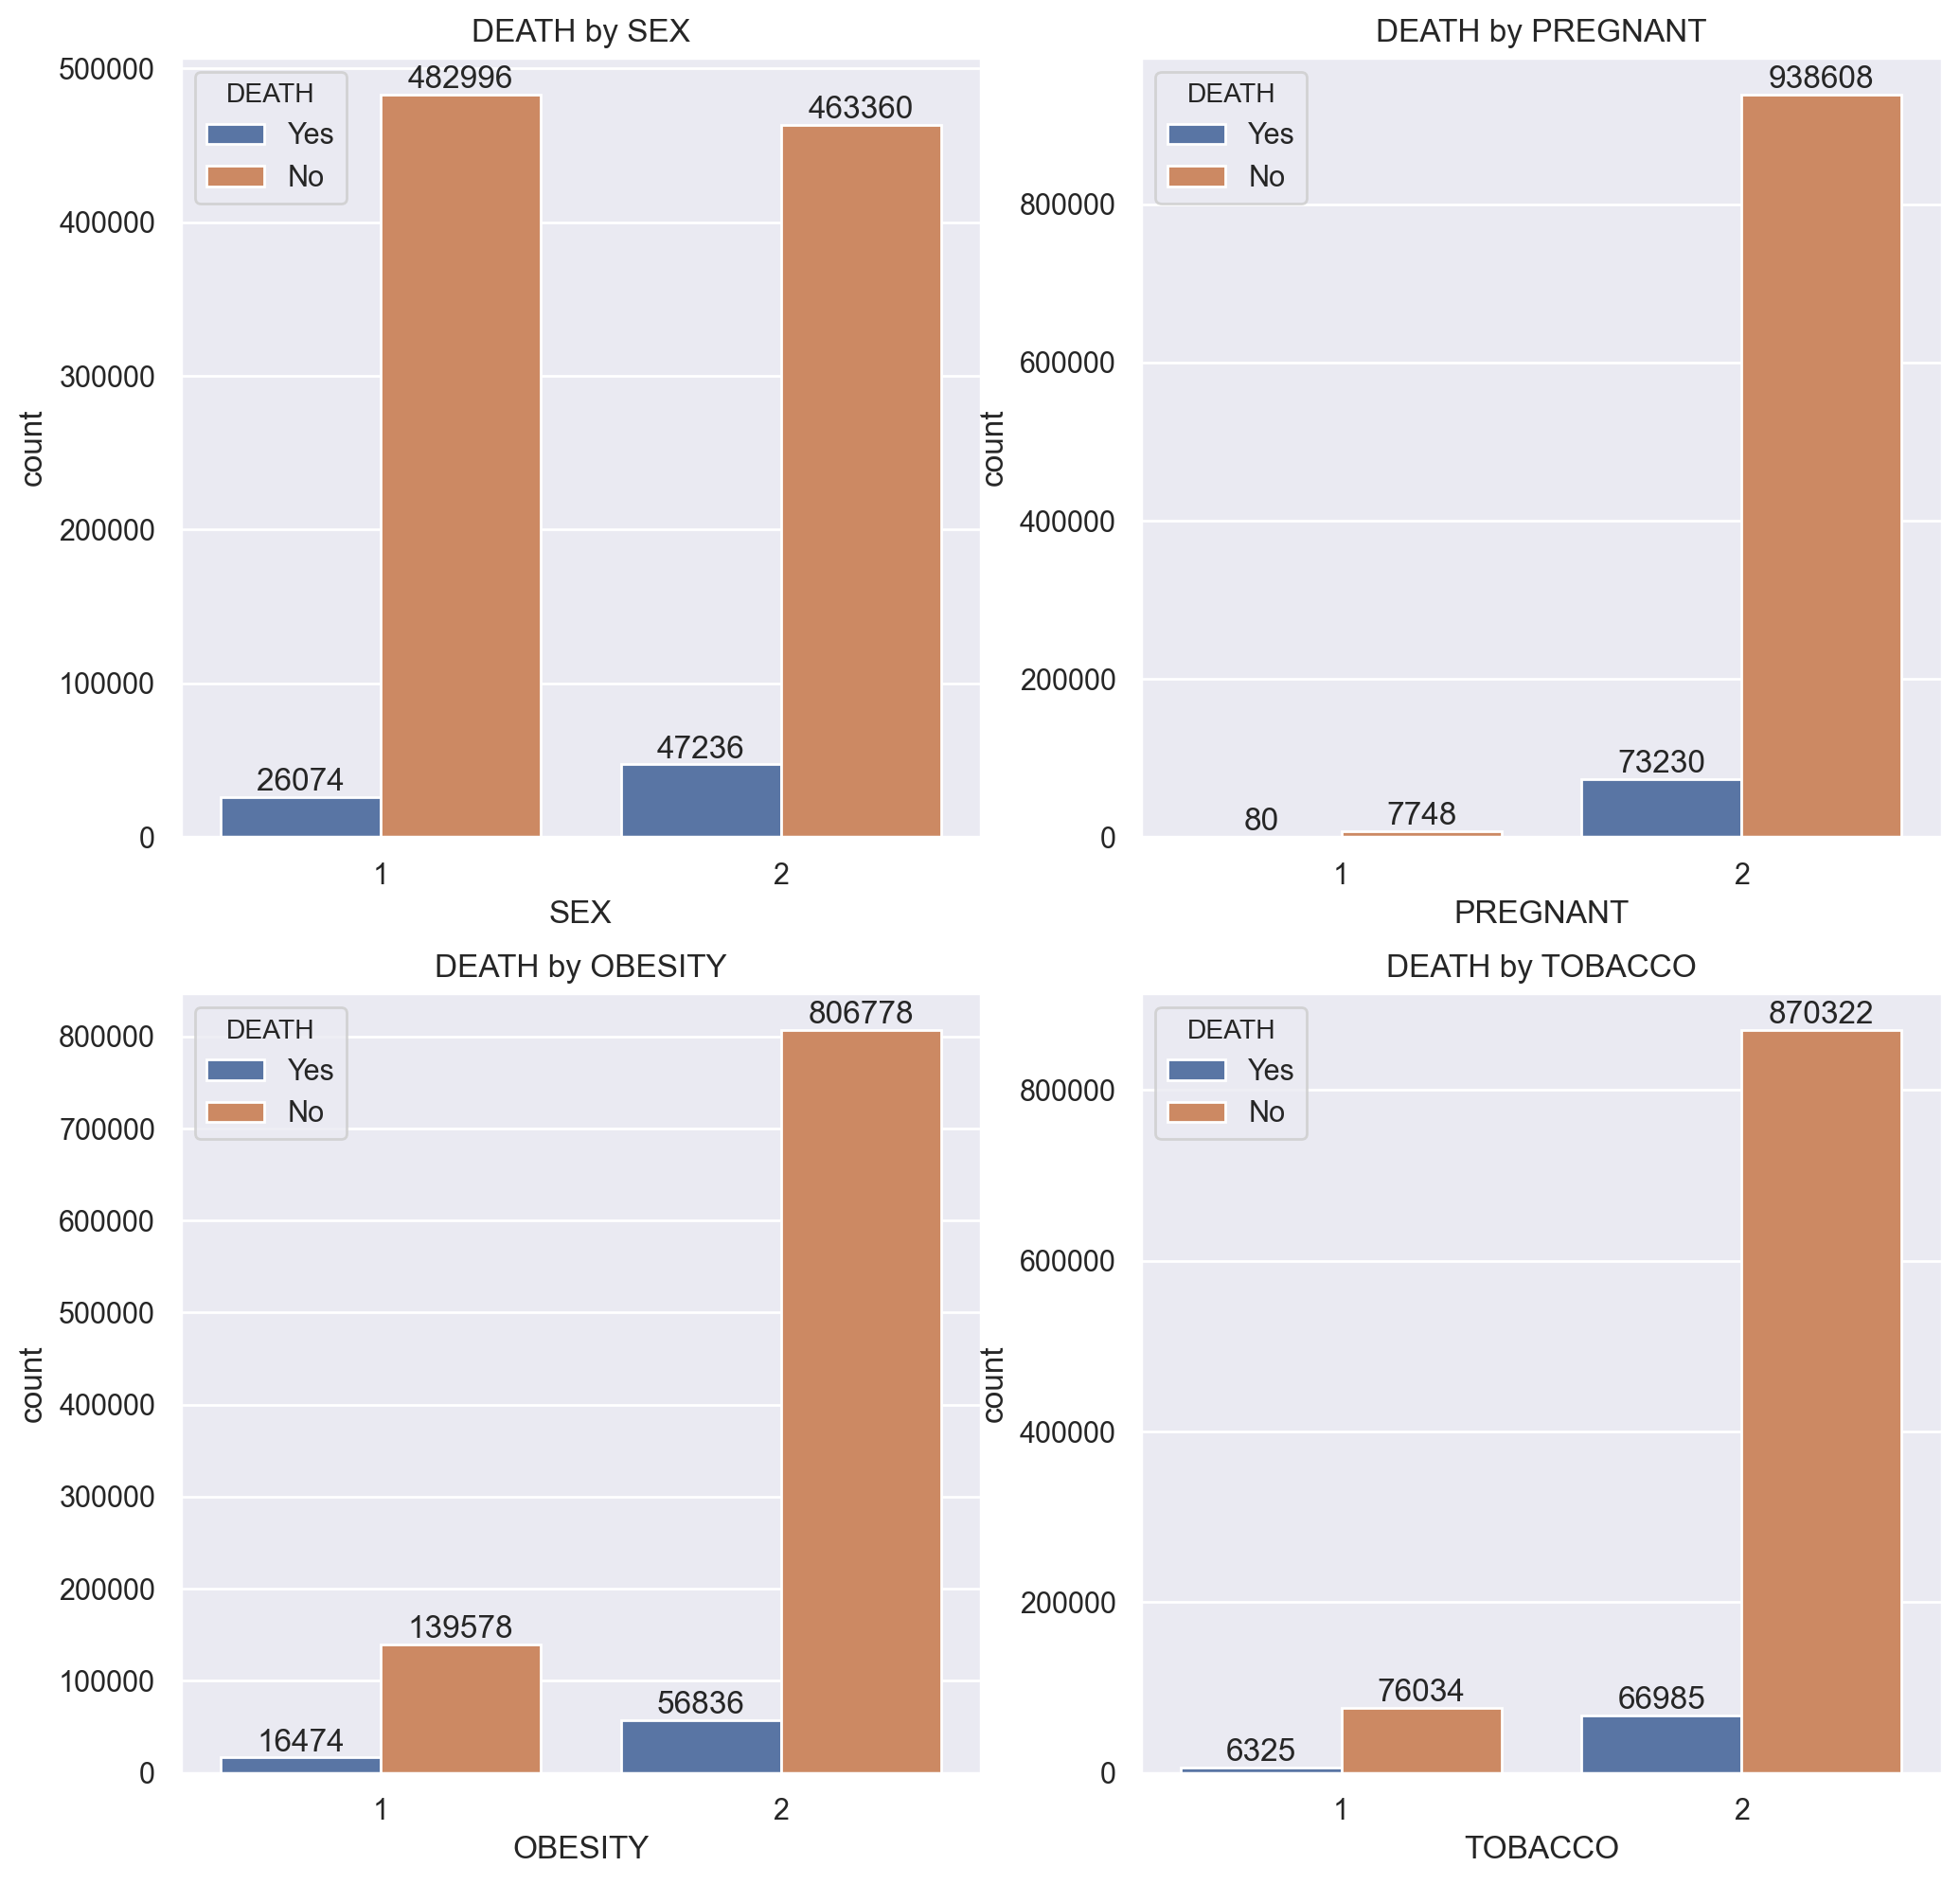

In [27]:
#个人基本情况
dic3={'rows':2,'cols':2,'lst':['SEX', 'PREGNANT', 'OBESITY', 'TOBACCO']}
plot_death.plot(dic3)

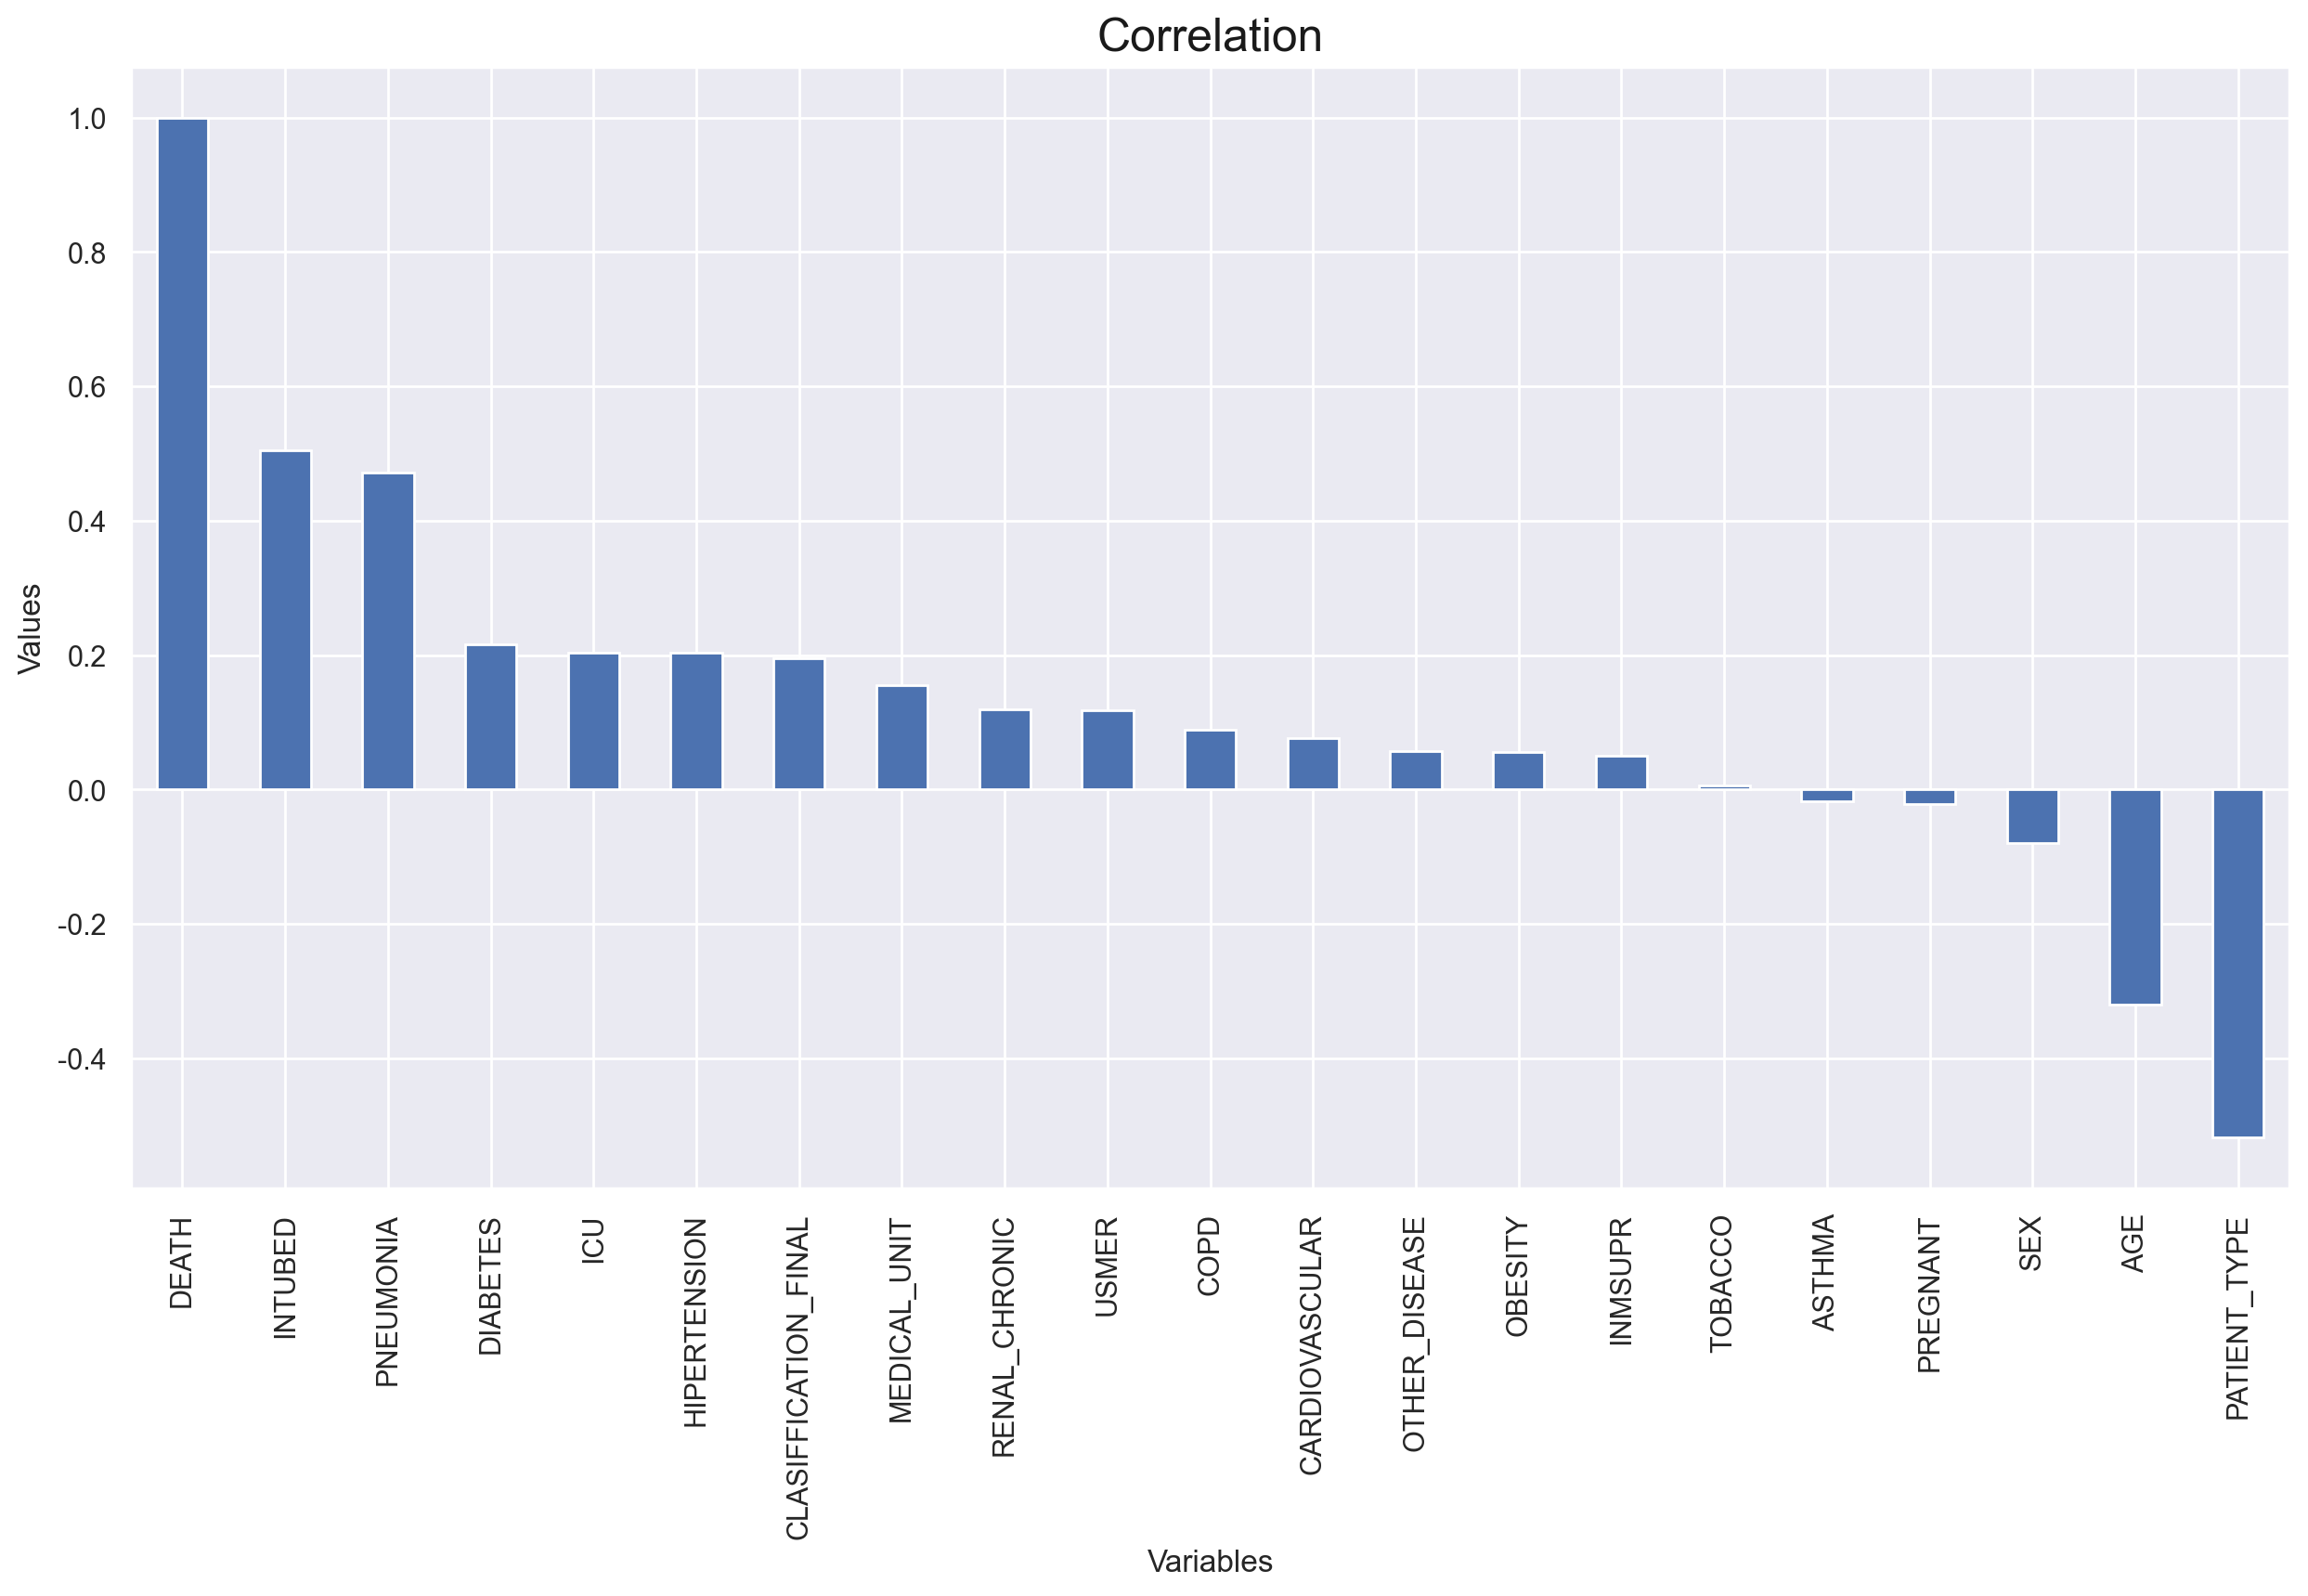

In [28]:
sns.set(style="darkgrid")
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(15,8), dpi=200)
df.corr()['DEATH'].sort_values(ascending = False).plot(kind='bar');

plt.xlabel("Variables")
plt.ylabel("Values")
plt.title("Correlation",fontsize=18, color="k");

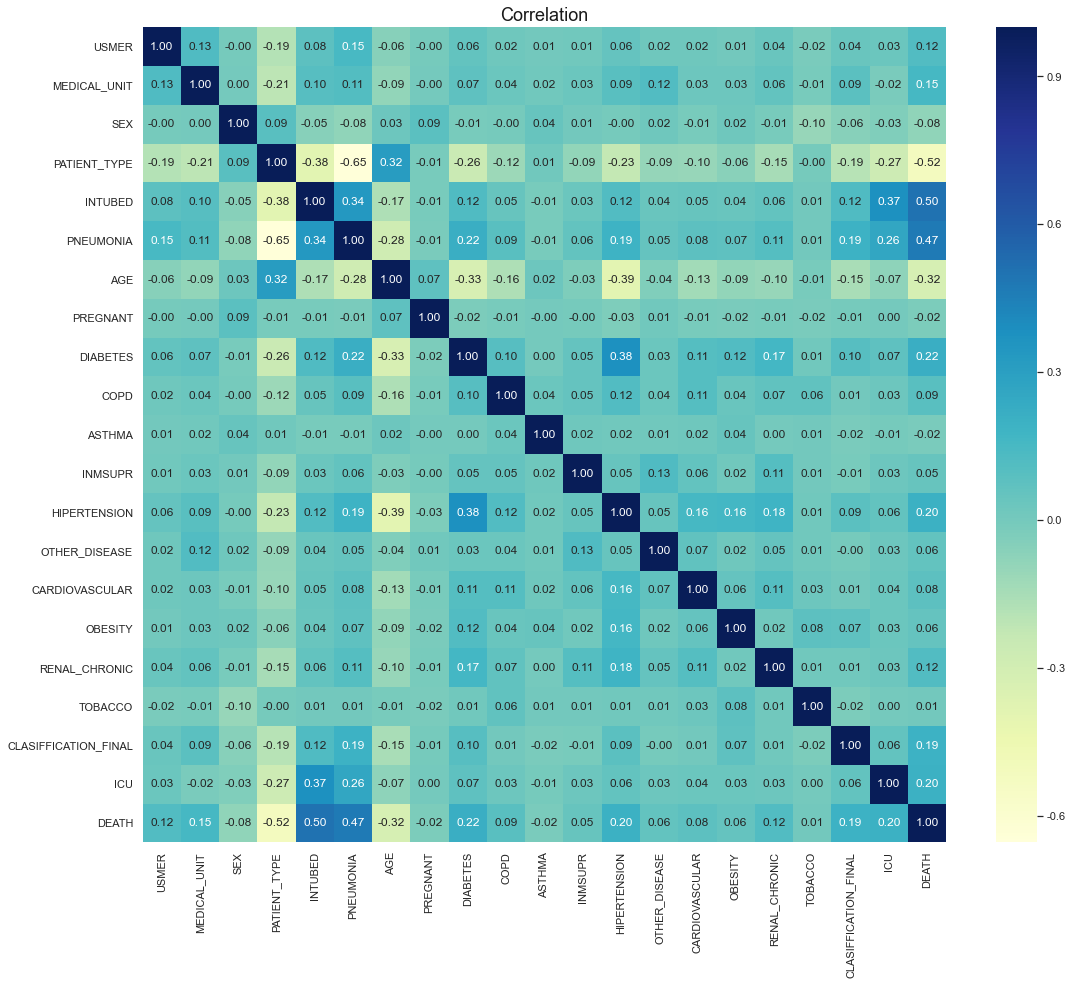

In [29]:
sns.set(style="darkgrid")
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True, fmt=".2f",cmap="YlGnBu")
plt.title("Correlation",fontsize=18, color="k");
plt.show()

In [30]:
class_more = df['DEATH'].value_counts().values[0]
class_less = df['DEATH'].value_counts().values[1]
print('存活、死亡比例:',df['DEATH'].value_counts().values/len(df))
print('存活/死亡：',class_more/class_less)

存活、死亡比例: [0.92810391 0.07189609]
存活/死亡： 12.90896194243623


In [31]:
#去掉冗余特征
#小于相关系数小于0.1的数据列进行删除
delete_columns = ["SEX","PREGNANT","COPD","ASTHMA","INMSUPR","OTHER_DISEASE","CARDIOVASCULAR",
                      "OBESITY","TOBACCO"]
df.drop(columns=delete_columns,inplace=True)

In [32]:
#保存数据
df.to_csv(r'./covid.csv',index=False)

In [33]:
df=pd.read_csv('./Covid.csv')
df['DEATH']=df['DEATH'].replace({2:0})

#### 模型分析

In [34]:
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression#逻辑回归
from sklearn.ensemble import RandomForestClassifier#随机森林
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score  
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.metrics import roc_curve

In [35]:
class Sample_set():
    def __init__(self,df,typ):
        '''
        初始化
        X：特征
        Y：分类
        typ：取样方法
        X_train, X_test, Y_train, Y_test：分割、取样后获得的集合
        '''
        dic = {'split_straight':0,'split_under':1,'split_SMOTE':2}
        self.X = df.drop(columns="DEATH")
        self.Y = df["DEATH"]
        try :
            self.typ = dic[typ]
        except KeyError:
            print("取样类型错误！请输入'split_straight','split_under'或'split_SMOTE'!")
        else:
            [self.X_train, self.X_test, self.Y_train, self.Y_test]=self.split()
            self.scale()
            self.print_shape()
        
    def split(self):
        '''
        按照特定的取样方法生成训练集和测试集
        输出：训练集和测试集
        '''
        
        if self.typ ==0:
            #直接划分训练集和测试集
            X_train, X_test, Y_train, Y_test = train_test_split(self.X,self.Y,test_size=0.3)
        if self.typ ==1:
            # 欠采样
            X_train, X_test, Y_train, Y_test = train_test_split(self.X,self.Y,test_size=0.3)
            undersample = RandomUnderSampler(sampling_strategy='majority')
            X_train, Y_train = undersample.fit_resample(X_train, Y_train)
        if self.typ ==2:
            #过采样
            from imblearn.over_sampling import SMOTE
            X_train, X_test, Y_train, Y_test = train_test_split(self.X,self.Y,test_size=0.3)
            SMOTE = SMOTE()
            X_train, Y_train = SMOTE.fit_resample(X_train, Y_train)
            
        return [X_train, X_test, Y_train, Y_test]
    
    def scale(self):
        '''
        标准化处理AGE列
        '''
        from sklearn.preprocessing import RobustScaler
        scaler = RobustScaler()
        self.X_train.AGE = scaler.fit_transform(self.X_train.AGE.values.reshape(-1,1))
        self.X_test.AGE = scaler.fit_transform(self.X_test.AGE.values.reshape(-1,1))
    
    def print_shape(self):
        '''
        打印训练集和测试集的shape
        '''
        print("训练集 X：",self.X_train.shape)
        print("训练集 Y：",self.Y_train.shape)
        print("测试集 X：",self.X_test.shape)
        print("测试集 Y：",self.Y_test.shape)

In [36]:
sample = Sample_set(df,'split')

取样类型错误！请输入'split_straight','split_under'或'split_SMOTE'!


In [37]:
sample1 = Sample_set(df,'split_straight')
[X_train, X_test, Y_train, Y_test]=[sample1.X_train, sample1.X_test, sample1.Y_train, sample1.Y_test]

训练集 X： (713766, 11)
训练集 Y： (713766,)
测试集 X： (305900, 11)
测试集 Y： (305900,)


In [38]:
sample2 = Sample_set(df,'split_under')
[X_train_under, X_test_under, Y_train_under, Y_test_under]=[sample2.X_train, sample2.X_test, sample2.Y_train, sample2.Y_test]

训练集 X： (102414, 11)
训练集 Y： (102414,)
测试集 X： (305900, 11)
测试集 Y： (305900,)


In [39]:
sample3 = Sample_set(df,'split_SMOTE')
[X_train_SMOTE, X_test_SMOTE, Y_train_SMOTE, Y_test_SMOTE]=[sample3.X_train, sample3.X_test, sample3.Y_train, sample3.Y_test]

训练集 X： (1325014, 11)
训练集 Y： (1325014,)
测试集 X： (305900, 11)
测试集 Y： (305900,)


In [40]:
print("不平衡数据: ", Counter(Y_train))
print("欠采样: ", Counter(Y_train_under))
print("过采样: ",Counter(Y_train_SMOTE))

不平衡数据:  Counter({0: 662500, 1: 51266})
欠采样:  Counter({0: 51207, 1: 51207})
过采样:  Counter({0: 662507, 1: 662507})


In [41]:
lr1 = LogisticRegression()
lr1 = lr1.fit(X_train, Y_train.ravel())
predictions1 = lr1.predict(X_test)
print("不平衡数据：")
print(classification_report(Y_test, predictions1))

lr2 = LogisticRegression()
lr2 = lr2.fit(X_train_under, Y_train_under.ravel())
predictions2 = lr2.predict(X_test_under)
print("欠采样：")
print(classification_report(Y_test_under, predictions2))

lr3 = LogisticRegression()
lr3 = lr3.fit(X_train_SMOTE, Y_train_SMOTE.ravel())
predictions3 = lr3.predict(X_test_SMOTE)
print("过采样：")
print(classification_report(Y_test_SMOTE, predictions3))

不平衡数据：
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    283856
           1       0.71      0.49      0.58     22044

    accuracy                           0.95    305900
   macro avg       0.83      0.74      0.78    305900
weighted avg       0.94      0.95      0.94    305900

欠采样：
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    283797
           1       0.37      0.95      0.53     22103

    accuracy                           0.88    305900
   macro avg       0.68      0.91      0.73    305900
weighted avg       0.95      0.88      0.90    305900

过采样：
              precision    recall  f1-score   support

           0       1.00      0.88      0.93    283849
           1       0.37      0.94      0.53     22051

    accuracy                           0.88    305900
   macro avg       0.68      0.91      0.73    305900
weighted avg       0.95      0.88      0.90    305900



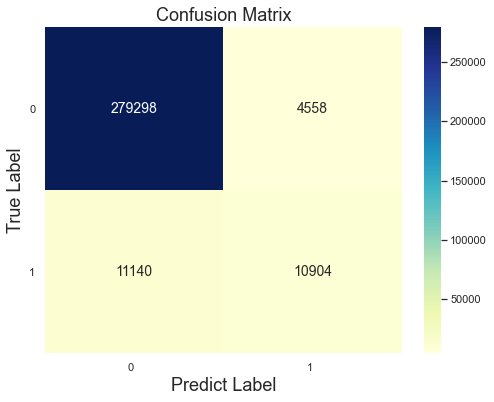

In [42]:
#不平衡数据
predictions1 = lr1.predict(X_test)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
conf_mat1 = confusion_matrix(Y_test, predictions1)
df_cm1 = pd.DataFrame(conf_mat1, index=[0,1], columns=[0,1])
heatmap = sns.heatmap(df_cm1, annot=True, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel("True Label",fontsize=18)
plt.xlabel("Predict Label",fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

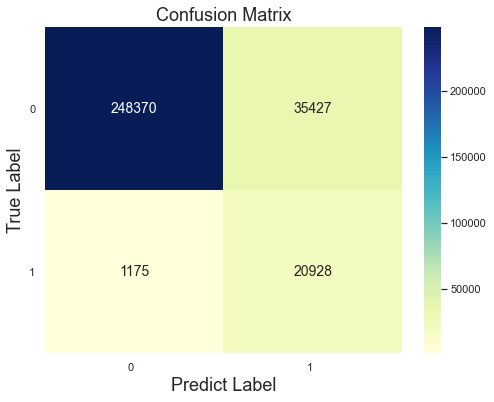

In [43]:
predictions = lr2.predict(X_test_under)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
conf_mat = confusion_matrix(Y_test_under, predictions)
df_cm = pd.DataFrame(conf_mat, index=[0,1], columns=[0,1])
heatmap = sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel("True Label",fontsize=18)
plt.xlabel("Predict Label",fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [44]:
#使用欠采样数据进行逻辑回归参数调优
lr4 = LogisticRegression()
parameters = {'penalty': ('l1', 'l2'),'C': (0.001,0.01, 0.1, 1, 10,100)}
grid_search = GridSearchCV(lr4, parameters,  verbose=0, scoring='balanced_accuracy', cv=5)
grid =grid_search.fit(X_train_under, Y_train_under.ravel())
print('最佳效果：%0.3f' % grid_search.best_score_)
best_parameters= grid_search.best_estimator_.get_params()
print('最佳参数：', best_parameters)

最佳效果：0.906
最佳参数： {'C': 0.01, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


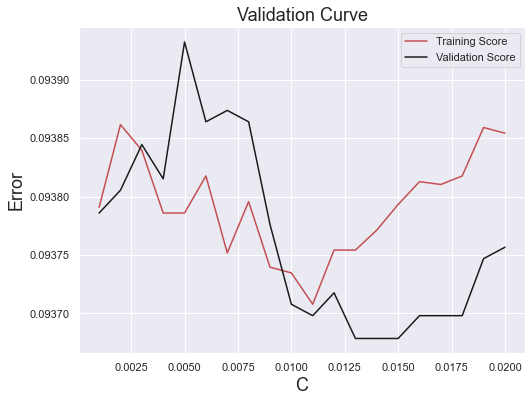

In [45]:
params_grid= list(np.linspace(0.001,0.02,20))
model = LogisticRegression(random_state=123)

train_scores,validation_scores = validation_curve(model,X_train_under, Y_train_under.ravel(),
                                            param_name='C',param_range=params_grid,
                                            scoring='balanced_accuracy',cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)



plt.figure(figsize=(8,6))

plt.plot(params_grid, 1-train_scores_mean, label='Training Score',color='r')
plt.plot(params_grid, 1-validation_scores_mean, label='Validation Score',color='k')


plt.title('Validation Curve',fontsize=18)
plt.xlabel('C',fontsize=18)
plt.ylabel('Error',fontsize=18)
plt.legend()
plt.show()

In [55]:
lrbest = LogisticRegression(C=0.009, penalty= 'l2',random_state=123)
lrbest.fit(X_train_under, Y_train_under.ravel())
predictions = lrbest.predict(X_test_under)
print(classification_report(Y_test_under, predictions))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93    283797
           1       0.37      0.95      0.53     22103

    accuracy                           0.88    305900
   macro avg       0.68      0.91      0.73    305900
weighted avg       0.95      0.88      0.90    305900



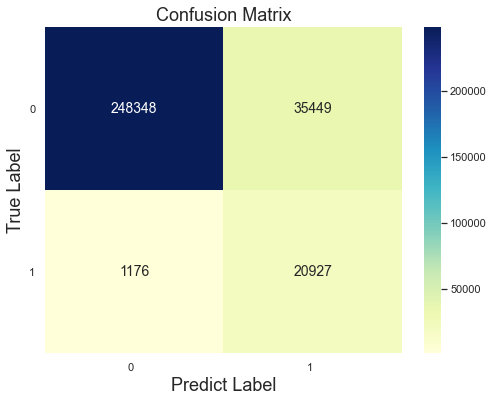

In [56]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
conf_mat = confusion_matrix(Y_test_under,predictions)
df_cm = pd.DataFrame(conf_mat, index=[0,1], columns=[0,1])
heatmap = sns.heatmap(df_cm, annot=True, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel("True Label",fontsize=18)
plt.xlabel("Predict Label",fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

In [52]:
rf=RandomForestClassifier(n_estimators=4,random_state=123)
rf.fit(X_train_under, Y_train_under.ravel())
predictions = rf.predict(X_test_under)
print(classification_report(Y_test_under, predictions))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92    283797
           1       0.33      0.92      0.48     22103

    accuracy                           0.86    305900
   macro avg       0.66      0.89      0.70    305900
weighted avg       0.94      0.86      0.89    305900



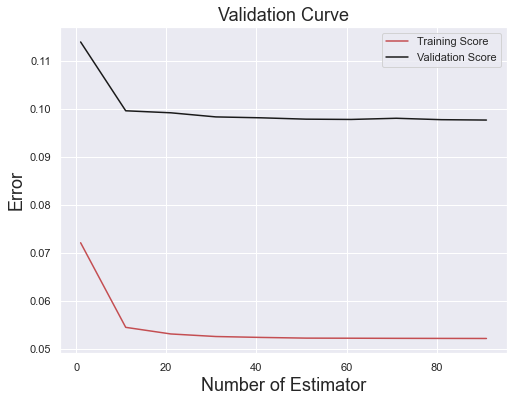

In [53]:
params_grid= list(range(1,101,10))
model = RandomForestClassifier(random_state=123)

train_scores,validation_scores = validation_curve(model,X_train_under, Y_train_under.ravel(),
                                            param_name='n_estimators',param_range=params_grid,
                                            scoring='balanced_accuracy',cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)



plt.figure(figsize=(8,6))

plt.plot(params_grid, 1-train_scores_mean, label='Training Score',color='r')
plt.plot(params_grid, 1-validation_scores_mean, label='Validation Score',color='k')


plt.title('Validation Curve',fontsize=18)
plt.xlabel('Number of Estimator',fontsize=18)
plt.ylabel('Error',fontsize=18)
plt.legend()
plt.show()

In [54]:
rfbest=RandomForestClassifier(n_estimators=40,random_state=123)
rfbest.fit(X_train_under, Y_train_under.ravel())
rfbestpredictions = rfbest.predict(X_test_under)
print(classification_report(Y_test_under, rfbestpredictions))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91    283797
           1       0.32      0.94      0.48     22103

    accuracy                           0.85    305900
   macro avg       0.66      0.89      0.70    305900
weighted avg       0.95      0.85      0.88    305900



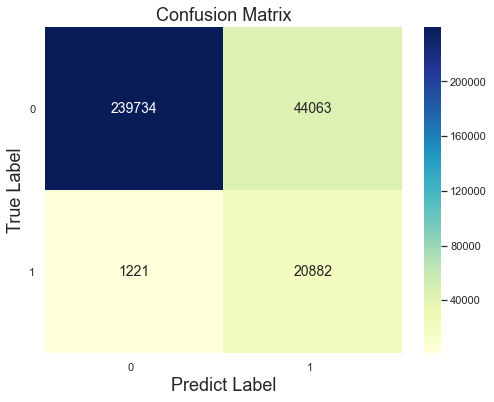

In [57]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,6))
rfbconf_mat = confusion_matrix(Y_test_under,rfbestpredictions)
rfbdf_cm = pd.DataFrame(rfbconf_mat, index=[0,1], columns=[0,1])
heatmap = sns.heatmap(rfbdf_cm, annot=True, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right')
plt.ylabel("True Label",fontsize=18)
plt.xlabel("Predict Label",fontsize=18)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

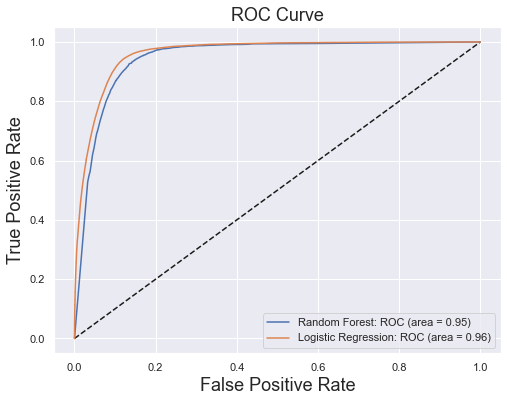

In [58]:
rfbest_pred = rfbest.predict_proba(X_test_under)
rffpr, rftpr, rfthresholds = roc_curve(Y_test_under, rfbest_pred[:,1])
rfroc_auc = auc(rffpr, rftpr)
plt.figure(figsize=(8,6))
plt.plot([0,1],[0,1],"k--")
plt.plot(rffpr, rftpr, label = "Random Forest: "+'ROC (area = {0:.2f})'.format(rfroc_auc))

lrbest_pred = lrbest.predict_proba(X_test_under)
fpr, tpr, thresholds = roc_curve(Y_test_under, lrbest_pred[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label="Logistic Regression: "+'ROC (area = {0:.2f})'.format(roc_auc))

plt.legend()
plt.xlabel("False Positive Rate",fontsize=18)
plt.ylabel("True Positive Rate",fontsize=18)
plt.title("ROC Curve",fontsize=18)
plt.show()

In [59]:
feature_results = pd.DataFrame({'Feature': list(X_train_under.columns), 
                                'Importance': rfbest.feature_importances_})

feature_results = feature_results.sort_values('Importance', ascending = False).reset_index(drop=True)

feature_results

,Feature,Importance
0,PATIENT_TYPE,0.374305
1,AGE,0.215023
2,PNEUMONIA,0.196562
3,INTUBED,0.071495
4,MEDICAL_UNIT,0.052805
5,CLASIFFICATION_FINAL,0.041554
6,DIABETES,0.016727
7,HIPERTENSION,0.015748
8,USMER,0.006503
9,RENAL_CHRONIC,0.005290


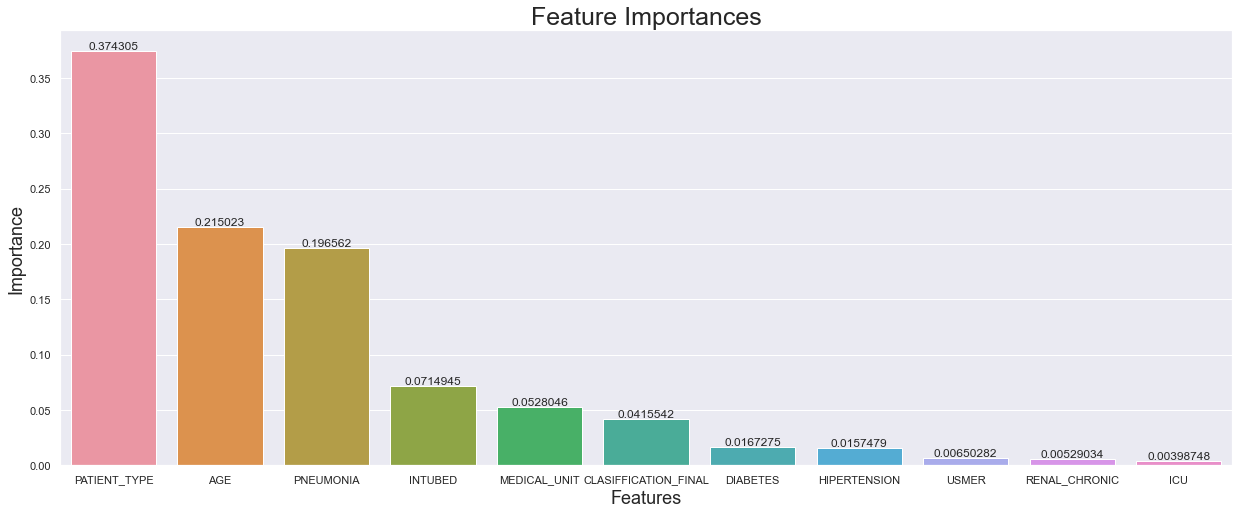

In [60]:
sns.set(style="darkgrid")
plt.figure(figsize = (21,8))
ax = sns.barplot(x = "Feature", y = "Importance", data =feature_results)
plt.title("Feature Importances", fontsize = 25)
plt.xlabel("Features",fontsize=18)
plt.ylabel("Importance",fontsize=18)
for bars in ax.containers:
    ax.bar_label(bars)